<a href="https://colab.research.google.com/github/subodh5/washingMachine/blob/main/fuzzyfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
from matplotlib import pyplot as plt

Membership function different shapes

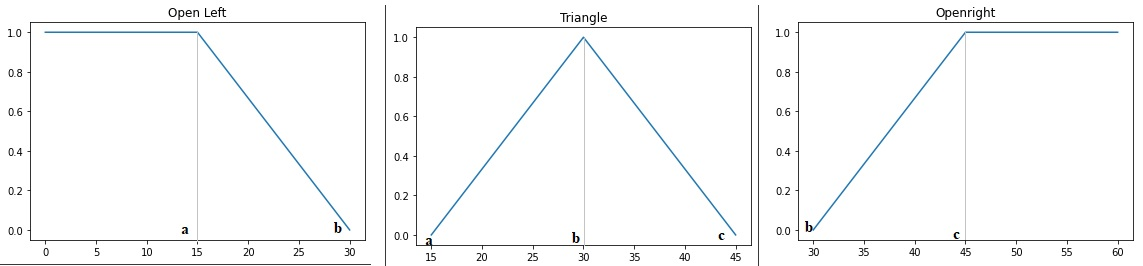

Membership function definition

In [58]:
def openleft(x,a,b):
    if x<a: return 1
    if x>=a and x<=b: return ((b-x)/(b-a))
    return 0

def openright(x,b,c):
    if x>c: return 1
    if x>b and x<=c: return ((x-b)/(c-b))
    return 0

def triangle(x,a,b,c):
    return max(min((x-a)/(b-a), (c-x)/(c-b)),0)

Fuzzification

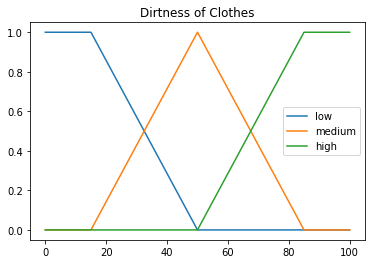

In [59]:
def dirtness_of_clothes(x):
    dmin,a,b,c,dmax=0,15,50,85,100
    low,medium,high=0,0,0
    low=openleft(x,a,b)
    medium=triangle(x,a,b,c)
    high=openright(x,b,c)
    return {"low":low,"medium":medium,"high":high}
  
#plot dirtness_of_clothes  
dmin,a,b,c,dmax=0,15,50,85,100
dirtiness_x=[dmin,a,b,c,dmax]
dirtiness_y_low=[1,1,0,0,0]
dirtiness_y_medium=[0,0,1,0,0]
dirtiness_y_high=[0,0,0,1,1]
plt.plot(dirtiness_x,dirtiness_y_low,label="low")
plt.plot(dirtiness_x,dirtiness_y_medium,label="medium")
plt.plot(dirtiness_x,dirtiness_y_high,label="high")
plt.title("Dirtness of Clothes")
plt.legend()

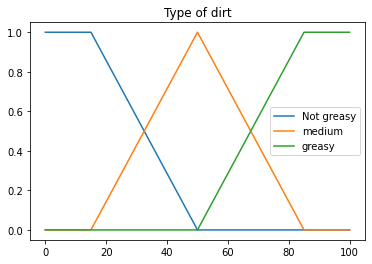

In [60]:
def type_of_dirt(x):
    dmin,a,b,c,dmax=0,15,50,85,100
    greasy,medium,not_greasy=0,0,0
    medium=triangle(x,a,b,c)
    greasy=openright(x,b,c)
    not_greasy=1-greasy   #Using hedge rule of negation
    return {"not_greasy":not_greasy,"medium":medium,"greasy":greasy}

smin,a,b,c,smax=0,15,50,85,100
type_x=[smin,a,b,c,smax]
type_y_notg=[1,1,0,0,0]
type_y_medium=[0,0,1,0,0]
type_y_greasy=[0,0,0,1,1]
plt.plot(type_x,type_y_notg,label="Not greasy")
plt.plot(type_x,type_y_medium,label="medium")
plt.plot(type_x,type_y_greasy,label="greasy")
plt.title("Type of dirt")
plt.legend()

Rules

In [61]:
def compare(v1,v2,v3):
    if v1==0 and v2==0 and v3==0: return 0
    temp=[v1,v2,v3]
    return min(x for x in temp if x != 0)

In [62]:
def rules(dirt,grease):
    #If dirtness_of_clothes is Large and type_of_dirt is Greasy then wash_time is Very Long
    very_long=(dirt["high"]*dirt_type["greasy"])

    #If dirtness_of_clothes is Medium and type_of_dirt is Greasy then wash_time is Long
    long1=(dirt["medium"]*dirt_type["greasy"])

    #If dirtness_of_clothes is Small and type_of_dirt is Greasy then wash_time is Long
    long2=(dirt["low"]*dirt_type["greasy"])

    #If dirtness_of_clothes is Large and type_of_dirt is Medium then wash_time is Long
    long3=(dirt["high"]*dirt_type["medium"])

    #If dirtness_of_clothes is Medium and type_of_dirt is Medium then wash_time is Medium
    medium1=(dirt["medium"]*dirt_type["medium"])

    #If dirtness_of_clothes is Small and type_of_dirt is Medium then wash_time is Medium
    medium2=(dirt["high"]*dirt_type["medium"])

    #If dirtness_of_clothes is Large and type_of_dirt is Not Greasy then wash_time is Medium
    medium3=(dirt["high"]*dirt_type["not_greasy"])

    #If dirtness_of_clothes is Medium and type_of_dirt is Not Greasy then wash_time is Short;
    short=(dirt["medium"]*dirt_type["not_greasy"])

    #If dirtness_of_clothes is Small and type_of_dirt is Not Greasy then wash_time is Very Short
    very_short=(dirt["low"]*dirt_type["not_greasy"])

    #since there are two or more long and medium, we have to compare them
    long_= compare(long1,long2,long3)
    medium=compare(medium1,medium2,medium3)

    return [very_short,short,medium,long_ , very_long]




Wash time plot

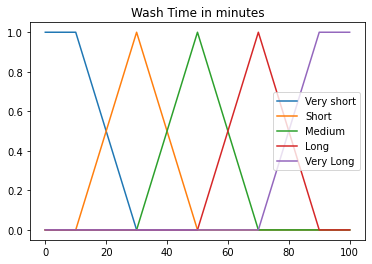

In [63]:
tmin,a,b,c,d,e,tmax=0,10,30,50,70,90,100
washtime_x=[tmin,a,b,c,d,e,tmax]
washtime_y_vshort=[1,1,0,0,0,0,0]
washtime_y_short=[0,0,1,0,0,0,0]
washtime_y_medium=[0,0,0,1,0,0,0]
washtime_y_long=[0,0,0,0,1,0,0]
washtime_y_vlong=[0,0,0,0,0,1,1]
plt.plot(washtime_x,washtime_y_vshort,label="Very short")
plt.plot(washtime_x,washtime_y_short,label="Short")
plt.plot(washtime_x,washtime_y_medium,label="Medium")
plt.plot(washtime_x,washtime_y_long,label="Long")
plt.plot(washtime_x,washtime_y_vlong,label="Very Long")
plt.title("Wash Time in minutes")
plt.legend()

In [64]:
def output_plot(x_arr,y):
    x_value=[0,10,30,50,70,90,100]
    label=["Short","Medium","Long"]

    plt.plot([x_value[0],x_arr[0],x_value[2]],[y[0],y[0],0],label="Very Short")
    for i in range(1,4):
        plt.plot([x_value[i],x_arr[i][0],x_arr[i][1],x_value[i+2]],[0,y[i],y[i],0],label=label[i-1])

    plt.plot([70,x_arr[-1],100],[0,y[-1],y[-1]],label="Very Long")

    plt.title("Result of Aggregation")
    plt.legend()

Defuzzification: Center of Sum method is implemented

In [65]:
#area calculation
def openleftarea(a,b,height):
    l1 = b
    l2 = b- height*(b-a)
    area = 1/2* (l1+l2)* height
    center=b/2
    x=l2
    return area,center,x

def openrightarea(b,c,height):
    l1 = 100-b
    l2 = l1-height*(l1-(100-c))
    area = 1/2 * (l1+l2)* height
    center= (100-b)/2 + b
    x=100-l2
    return area,center,x

def trianglearea(a,b,c,height):
    x1 = height*(b-a) + a
    x2 = c - height*(c-b)
    d1 = c-a
    d2 = x2-x1
    area = (1/2)*height*(d1 + d2)
    center=b
    x=[a+((d1-d2)/2),c-((d1-d2)/2)]
    return area,center,x

In [66]:
def defuzzify(fuzzy_washtime):
  #wash time x-values
    x_value=[0,10,30,50,70,90,100]

    Area=[0]*len(fuzzy_washtime)
    center=[0]*len(fuzzy_washtime)
    output_x=[0]*len(fuzzy_washtime)

    for i in range(0,len(fuzzy_washtime)):
        if i==0:
            Area[i],center[i],output_x[i]=openleftarea(x_value[i+1],x_value[i+2],fuzzy_washtime[i])


        elif i>=1 and i < (len(fuzzy_washtime)-1):
            Area[i],center[i],output_x[i]=trianglearea(x_value[i],x_value[i+1],x_value[i+2],fuzzy_washtime[i])

        elif i == (len(fuzzy_washtime)-1):
            Area[i],center[i],output_x[i]=openrightarea(x_value[i],x_value[i+1],fuzzy_washtime[i])
  
    upper_sum,lower_sum=0,0
    for i in range(0,len(Area)):
        upper_sum += Area[i]*center[i]
        lower_sum += Area[i]
  
    if lower_sum:
        crisp=upper_sum/lower_sum
    else:
        crisp=0
    output_plot(output_x,fuzzy_washtime)
    return crisp

Input dirtness and Dirt type (Greasiness) from range 1 to 100

[0.3918367346938776, 0.46530612244897956, 0.4653061224489795, 0.06530612244897958, 0.0]
The additional required time for washing is:  35.65040650406504  minutes


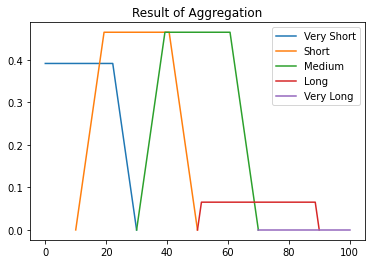

In [68]:
dirt=dirtness_of_clothes(34)
dirt_type=type_of_dirt(55)
fuzzy_washtime=rules(dirt,dirt_type)
print(fuzzy_washtime)
time=defuzzify(fuzzy_washtime)
print("The additional required time for washing is: ",time," minutes")